# BOSTON REAL ESTATE CASE STUDY
##### August 2021

## ASK

1. **Business task:**
In this case study, we will look at a dataset mentioning various factors and outcomes affecting gross revenue of movies and understand the correlation between the parameters.


2. **Stakeholders:**
+ OTT players
+ People looking for highest rated movie to watch

## PREPARE

**Data Source** : The dataset consists of movies from 1980 till 2020. Downloaded from [kaggle](https://www.kaggle.com/danielgrijalvas/movies).

**Data Organization** : The dataset is in .csv format, contains 7668 observation and 15 fields. Below is the information.

Field name|Description
------|------
name|Movie name
rating|Rating of the movie (R, PG, etc.)
genre|Main genre of movie
year|Year of release
released|Released date
score|IMDb user rating out of 10
votes|Number of user votes
director|Director of Movie
writer|Writer of movie
star|Main Actor / Actress
country|Country of origin
budget|Budget of movie
gross|Revenue of movie in `$`
company|The Production company
runtime|Duration of movie in minutes

+ **Any issue with bias or credibility in data ?** Since it's a public dataset, we are assuming the data maintains ROCCC(Reliable, Original, Comprehensive, Current, Cited).
+ **Addressing licensing, privacy, security and accessibility?** There is no sensible information in the file
+ **Verify data's integrity** There are few null values which may affect our analysis.

# PROCESS

**Tools used**: Python for cleaning and analyzing and data Vizulization.

**Transform / Documentation of cleaning and manipulation of data**:

+ First we download the dataset from kaggle and save it in local drive. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
import os
os.chdir("D:\Case studies\Movies")

In [4]:
# Read the data
movies_df = pd.read_csv('movies.csv')
print(movies_df.sample(5))
print(movies_df.shape)

                                 name rating      genre  year  \
5605                      Bright Star     PG  Biography  2009   
2845                   Romeo + Juliet  PG-13      Drama  1996   
5962  Bucky Larson: Born to Be a Star      R     Comedy  2011   
3869                    Moulin Rouge!  PG-13      Drama  2001   
1512                       Teen Witch  PG-13     Comedy  1989   

                               released  score     votes       director  \
5605    October 9, 2009 (United States)    6.9   26000.0   Jane Campion   
2845   November 1, 1996 (United States)    6.7  216000.0   Baz Luhrmann   
5962  September 9, 2011 (United States)    3.2   12000.0      Tom Brady   
3869       June 1, 2001 (United States)    7.6  271000.0   Baz Luhrmann   
1512     April 28, 1989 (United States)    6.1    8600.0  Dorian Walker   

                   writer               star         country      budget  \
5605         Jane Campion      Abbie Cornish  United Kingdom   8500000.0   
2845  

+ Let's check the percentage of missing values in every column

In [5]:
# check for missing data

for col in movies_df.columns:
    pct_missing = np.mean(movies_df[col].isnull())*100
    print('{} - {:.2f}%'.format(col, pct_missing))

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


+ Approximately 30% of the data are null values. We will drop them.

In [6]:
# Drop null values
movies_df.dropna(inplace = True)

In [7]:
movies_df.shape

(5421, 15)

+ There are 5421 movies in the dataset now.
+ Let's check the info of movies dataset 

In [8]:
# Data types for columns
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


+ Change the datatype of gross, budget and votes.

In [11]:
# change datatype for column

movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['gross'] = movies_df['gross'].astype('int64')
movies_df['votes'] = movies_df['votes'].astype('int64')

In [12]:
# Look at sample data
movies_df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2655,Desperado,R,Action,1995,"August 25, 1995 (United States)",7.2,175000,Robert Rodriguez,Robert Rodriguez,Antonio Banderas,United States,7000000,25405445,Columbia Pictures,104.0
4201,All About the Benjamins,R,Action,2002,"March 8, 2002 (United States)",5.9,13000,Kevin Bray,Ronald Lang,Ice Cube,United States,15000000,26306533,New Line Cinema,95.0
6208,Upside Down,PG-13,Drama,2012,"May 1, 2013 (France)",6.4,70000,Juan Solanas,Juan Solanas,Jim Sturgess,Canada,60000000,22187813,Upside Down Films,109.0
2060,Far and Away,PG-13,Adventure,1992,"May 22, 1992 (United States)",6.6,60000,Ron Howard,Bob Dolman,Tom Cruise,United States,60000000,137783840,Imagine Films Entertainment,140.0
249,Airplane II: the Sequel,PG,Comedy,1982,"December 10, 1982 (United States)",6.2,50000,Ken Finkleman,Ken Finkleman,Robert Hays,United States,15000000,27150534,Paramount Pictures,85.0


+ Let's check the statistical description of data

In [13]:
movies_df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


+ Statistical description of data looks fine. The score are in the range of 1 to 10. The max runtime of movie is 271 min (4 hrs 31 min) which is true. The movie is called [Gettysburg](https://en.wikipedia.org/wiki/Gettysburg_(1993_film))

+ Sort the data by gross in descending order.

In [14]:
movies_df.sort_values(by = ['gross'], inplace= True, ascending = False)

In [15]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


+ Check for duplicates in the dataset.

In [16]:
# check for duplicates
duplicated_row = movies_df[movies_df.duplicated()]
print(duplicated_row)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


There are no duplicates. Every record in the dataset is unique.

### Documnetiong the cleaning and pre-processing the data

+ After importing the data, we checked for null values in the dataset and dropped all of it. 
+ We changed the datatype of **gross, budget and votes** from float to int.
+ Sorted the dataset by Gross revenue in descending order.
+ We checked for duplicate values if any and there were none.

## ANALYZE

+ We hypothesize that budget will have high correlation with Gross revenue.
+ Also the Company production name will have high correlation with Gross revenue

Let's plot the relation between budget ang gross revenue using scatter plot and also plot a regression line on it.

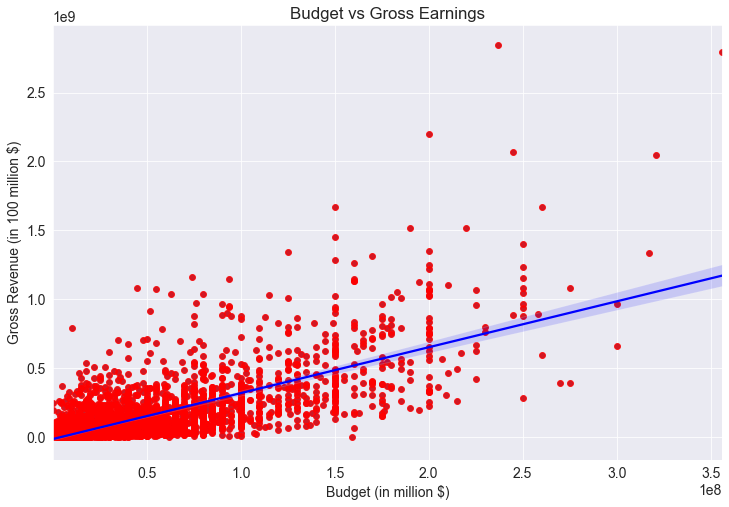

In [18]:
# scatterplot with budget vs gross revenue

sns.scatterplot(data=movies_df, x = 'budget', y = 'gross')
sns.regplot(data=movies_df, x = 'budget', y = 'gross', scatter_kws={'color':'red'}, line_kws = {'color':'blue'})
plt.xlabel('Budget (in million $)')
plt.ylabel('Gross Revenue (in 100 million $)')
plt.title('Budget vs Gross Earnings');

+ From the above plot, we can say that budget is moderately postive correlated with Gross revenue. To check how much they are correlated, we will plot Heatmap

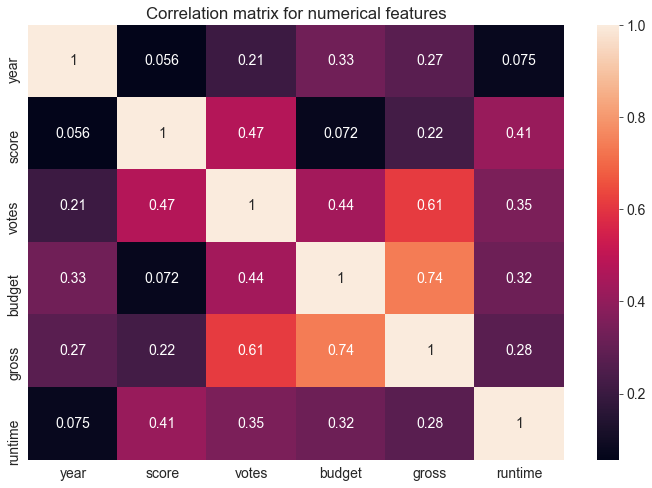

In [19]:
# Let's start looking ar correlation using heatmap

sns.heatmap(movies_df.corr(), annot = True)
plt.title('Correlation matrix for numerical features');

+ From the above plot, we can see that Gross has high positive correlation with Budget and votes. Votes and score are moderately positive correlated.

We want to check whether Company or other fields has some relation with Gross. For this, we will assign random numbers to unique value whose datatype is object.

In [20]:
# Convert object fields to numbers

movies_df_numerized = movies_df.copy()

for col in movies_df_numerized.columns:
    if (movies_df_numerized[col].dtype == 'object'):
        movies_df_numerized[col] = movies_df_numerized[col].astype('category')
        movies_df_numerized[col] = movies_df_numerized[col].cat.codes
        
movies_df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0


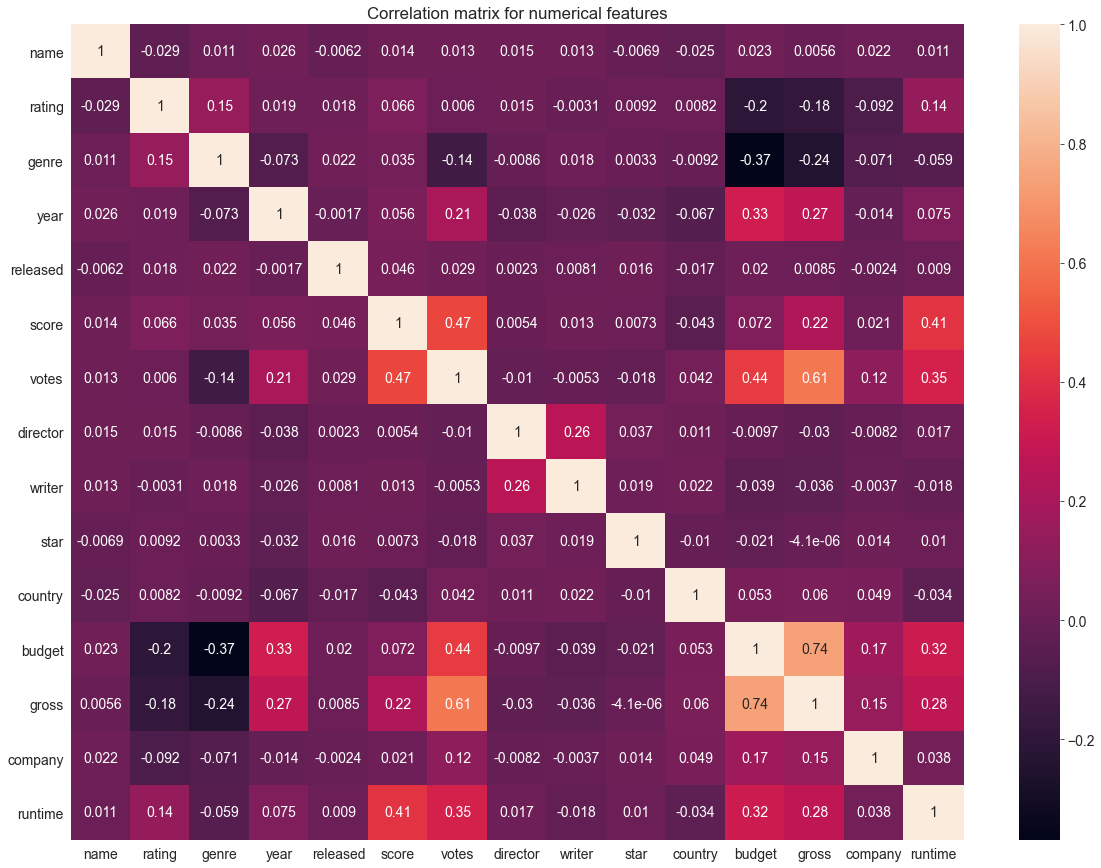

In [21]:
# Let's start looking ar correlation using heatmap

plt.figure(figsize = (20,15))
sns.heatmap(movies_df_numerized.corr(), annot = True)
plt.title('Correlation matrix for numerical features');

+ Let's filter the correlation matrix by displaying those data whose correlation value is greater than 0.5

In [22]:
correlation_mat = movies_df_numerized.corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.025542
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64


In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [24]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
print(high_corr)

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


## SHARE (Inferences and Conclusions)

+ Budget has high positive correlation with Gross. So our first hypothesis was true.
+ Gross has high postive correaltion with votes which we didnt count in our hypothesis.
+ Company has low positive correlation with budget which means our second hypothesis was incorrect.